# Lesson 7: Creating itineraries for multiple cities

In this lesson, you will use everything you have seen so far to plan the perfect vacation around the world!

To get started, import some helper functions:

In [1]:
from helper_functions import print_llm_response, get_llm_response, display_table
from IPython.display import Markdown
import csv

## Reading travel itineraries from a CSV file

First, define a new function that reads data stored in a CSV file and returns it as a dictionary variable:

In [2]:
def read_csv(file):
    # Open the file
    f = open(file, "r")
    # Load the data
    csv_reader = csv.DictReader(f)
    data = []
    for row in csv_reader:
        data.append(row)
    f.close()
    # Return data
    return data

Next, load itineraries from `itinerary.csv` using the function you just defined (notice how much less code this is!) and then display the table of itineraries:

In [3]:
# Read the itinerary.csv file
itinerary = read_csv("itinerary.csv")

# Display the itinerary
display_table(itinerary)

Arrival,Departure,City,Country
July-01,July-08,New York,USA
July-09,July-16,Rio de Janeiro,Brazil
July-17,July-24,Cape Town,South Africa
July-25,August-01,Istanbul,Turkey
August-02,August-09,Paris,France
August-10,August-17,Tokyo,Japan
August-18,August-25,Sydney,Australia


## Reading restaurant information from food journal entries

Now create a new function called `read_journal` that reads in the contents of a plain text file with '.txt' extension and stores it into a string variable:

In [4]:
# The function called 'read_journal'
def read_journal(journal_file):
    f = open(journal_file, "r")
    journal = f.read() 
    f.close()

    # Return the journal content
    return journal

Note that you used this function in an earlier lesson - now you know how it works!

You can now use the `read_journal` function to read in a food journal file - let's start with Sydney:

In [5]:
journal = read_journal("sydney.txt")

print(journal)

My culinary adventure began at Saint Peter, a renowned seafood restaurant in Paddington. This place is a temple to Australian seafood, and the "Murray Cod" was a revelation. The fish, sourced from the Murray River, was perfectly cooked, with a crispy skin and tender, flaky flesh. It was served with a simple yet flavorful accompaniment of seasonal vegetables, allowing the quality of the fish to shine. The restaurant's dedication to sustainability and nose-to-tail seafood cooking added an educational aspect to the delicious meal.

Next, I visited Billy Kwong in Potts Point, where celebrated chef Kylie Kwong puts a unique spin on modern Australian cuisine using native ingredients. The standout dish here was the "Crispy Skin Duck with Davidson’s Plum Sauce." The duck was cooked to perfection, with a rich, flavorful meat and delightfully crispy skin, complemented by the tart and slightly sweet Davidson’s plum sauce. This dish was a perfect example of how traditional recipes can be elevated 

Write a prompt that extracts restaurant and specialty dish information from the journal text and stores it in CSV format:

In [6]:
# Write the prompt
prompt = f"""Please extract a comprehensive list of the restaurants 
and their respective specialties mentioned in the following journal entry. 
Ensure that each restaurant name is accurately identified and listed. 
Provide your answer in CSV format, ready to save. 
Exclude the "```csv" declaration, don't add spaces after the comma, include column headers.

Format:
Restaurant, Specialty
Res_1, Sp_1
...

Journal entry:
{journal}
"""

# Print the prompt
print_llm_response(prompt)

Restaurant,Specialty
Saint Peter,Murray Cod
Billy Kwong,Crispy Skin Duck with Davidson’s Plum Sauce
The Lord Nelson Brewery Hotel,Roast Lamb
Vic's Meat Market,BBQ Beef Brisket
Bennelong,Sydney Rock Oysters


Read in restaurant information from `Sydney.csv` file that was created for you and display it using the `display_table` function:

In [7]:
# Use the read_csv function
sydney_restaurants = read_csv("Sydney.csv")

display_table(sydney_restaurants)

Restaurant,Specialty
Saint Peter,Murray Cod
Billy Kwong,Crispy Skin Duck with Davidson’s Plum Sauce
The Lord Nelson Brewery Hotel,Roast Lamb
Carriageworks Farmers Market,Kangaroo Pie
Vic's Meat Market,BBQ Beef Brisket
Bennelong,Sydney Rock Oysters


## Creating detailed itineraries with restaurant suggestions

In this section, you'll combine the data in the journal and the itinerary to create a detailed plan for your visit to Sydney. 

To access Sydney's data in the ```itinerary``` list, you have to use index '6' since Sydney is the seventh trip destination.

In [8]:
# Select Sydney from the 'itinerary' list
trip_stop = itinerary[6]

Next, store all the information from that ```trip_stop```, as well as the restaurant information you read in above, in separate variables:

In [9]:
city = trip_stop["City"]
country = trip_stop["Country"]
arrival = trip_stop["Arrival"]
departure = trip_stop["Departure"]
restaurants = sydney_restaurants

Pass all of this information in a detailed prompt to an LLM to create a detailed itinerary:

In [10]:
# Write the prompt
prompt = f"""I will visit {city}, {country} from {arrival} to {departure}. 
Create a daily itinerary with detailed activities. 
Designate times for breakfast, lunch, and dinner. 

I want to visit the restaurants listed in the restaurant dictionary 
without repeating any place. Make sure to mention the specialty
that I should try at each of them.

Restaurant dictionary:
{restaurants}

"""

response = get_llm_response(prompt)

# Print the LLM response in Markdown format
display(Markdown(response))

### Sydney Itinerary: August 18 - August 25

#### Day 1: August 18 (Saturday)
- **Breakfast**: 8:00 AM - Local café (try a flat white)
- **Morning Activity**: Explore the Sydney Opera House and take a guided tour.
- **Lunch**: 12:30 PM - **Bennelong**  
  - **Specialty**: Sydney Rock Oysters
- **Afternoon Activity**: Stroll through the Royal Botanic Garden.
- **Dinner**: 7:00 PM - Local restaurant (try a seafood platter)

---

#### Day 2: August 19 (Sunday)
- **Breakfast**: 8:00 AM - Local café (try avocado toast)
- **Morning Activity**: Visit the Art Gallery of New South Wales.
- **Lunch**: 12:30 PM - **Billy Kwong**  
  - **Specialty**: Crispy Skin Duck with Davidson’s Plum Sauce
- **Afternoon Activity**: Explore the historic Rocks district.
- **Dinner**: 7:00 PM - Local restaurant (try a steak)

---

#### Day 3: August 20 (Monday)
- **Breakfast**: 8:00 AM - Local café (try a smoothie bowl)
- **Morning Activity**: Take a ferry to Manly Beach.
- **Lunch**: 12:30 PM - Beachside café (try fish and chips)
- **Afternoon Activity**: Relax on Manly Beach and walk along the promenade.
- **Dinner**: 7:00 PM - Local restaurant (try a burger)

---

#### Day 4: August 21 (Tuesday)
- **Breakfast**: 8:00 AM - Local café (try pancakes)
- **Morning Activity**: Visit Taronga Zoo.
- **Lunch**: 12:30 PM - **Carriageworks Farmers Market**  
  - **Specialty**: Kangaroo Pie
- **Afternoon Activity**: Explore the zoo and enjoy the views of the Sydney skyline.
- **Dinner**: 7:00 PM - Local restaurant (try a pasta dish)

---

#### Day 5: August 22 (Wednesday)
- **Breakfast**: 8:00 AM - Local café (try a breakfast burrito)
- **Morning Activity**: Walk across the Sydney Harbour Bridge.
- **Lunch**: 12:30 PM - **The Lord Nelson Brewery Hotel**  
  - **Specialty**: Roast Lamb
- **Afternoon Activity**: Visit the Museum of Contemporary Art.
- **Dinner**: 7:00 PM - Local restaurant (try a curry)

---

#### Day 6: August 23 (Thursday)
- **Breakfast**: 8:00 AM - Local café (try a chai latte)
- **Morning Activity**: Explore Darling Harbour and visit SEA LIFE Sydney Aquarium.
- **Lunch**: 12:30 PM - Local restaurant (try a poke bowl)
- **Afternoon Activity**: Visit the Australian National Maritime Museum.
- **Dinner**: 7:00 PM - Local restaurant (try a risotto)

---

#### Day 7: August 24 (Friday)
- **Breakfast**: 8:00 AM - Local café (try a croissant)
- **Morning Activity**: Visit Bondi Beach and take the coastal walk to Coogee.
- **Lunch**: 12:30 PM - Local café in Coogee (try a salad)
- **Afternoon Activity**: Relax at Coogee Beach.
- **Dinner**: 7:00 PM - Local restaurant (try a seafood dish)

---

#### Day 8: August 25 (Saturday)
- **Breakfast**: 8:00 AM - Local café (try a muffin)
- **Morning Activity**: Last-minute shopping at Queen Victoria Building.
- **Lunch**: 12:30 PM - Local café (try a sandwich)
- **Afternoon Activity**: Visit the Sydney Tower Eye for panoramic views.
- **Dinner**: 6:00 PM - Local restaurant (try a dessert)

---

Enjoy your trip to Sydney!

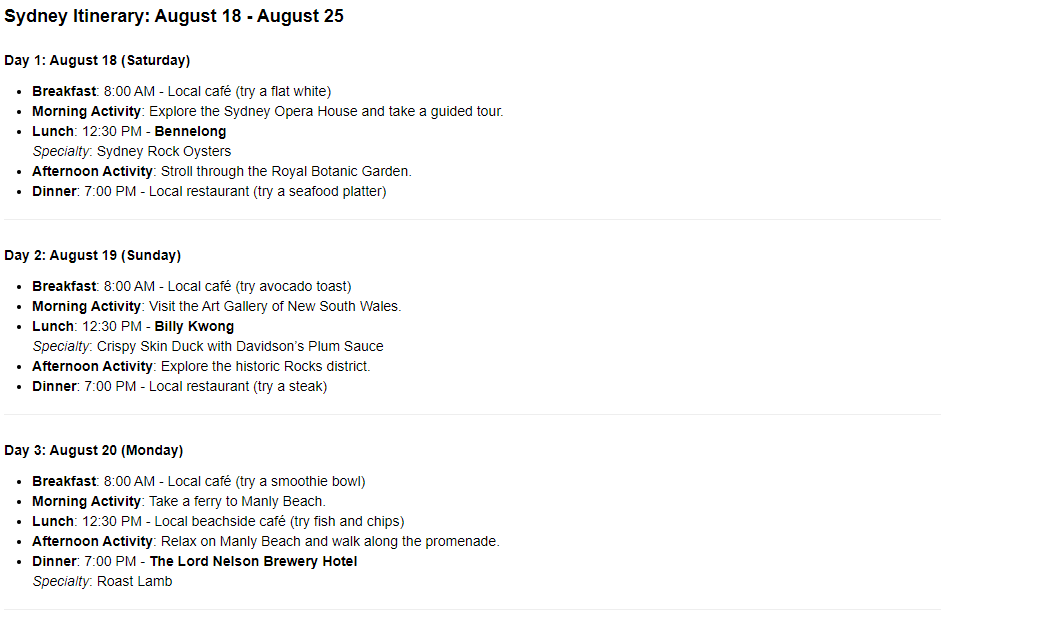

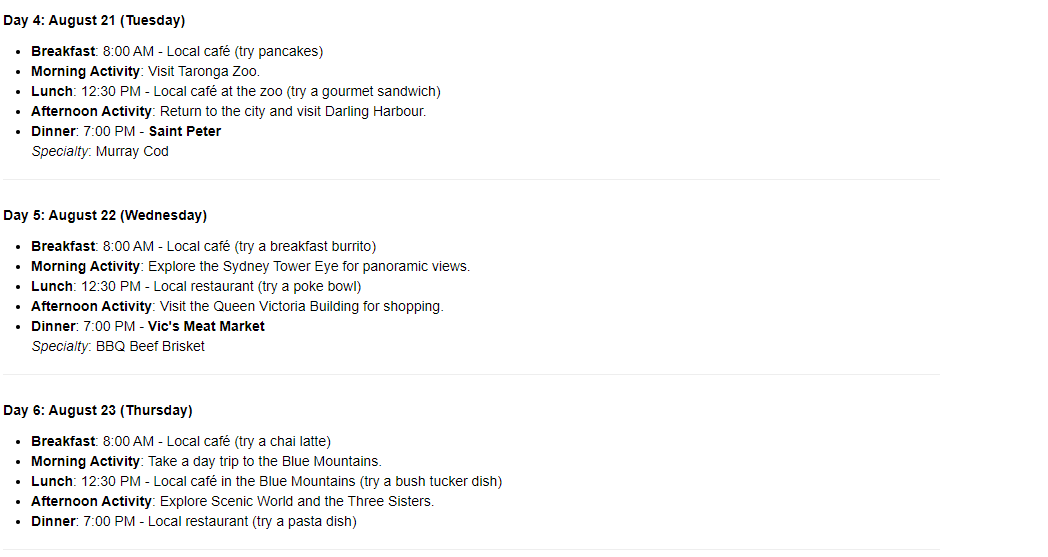

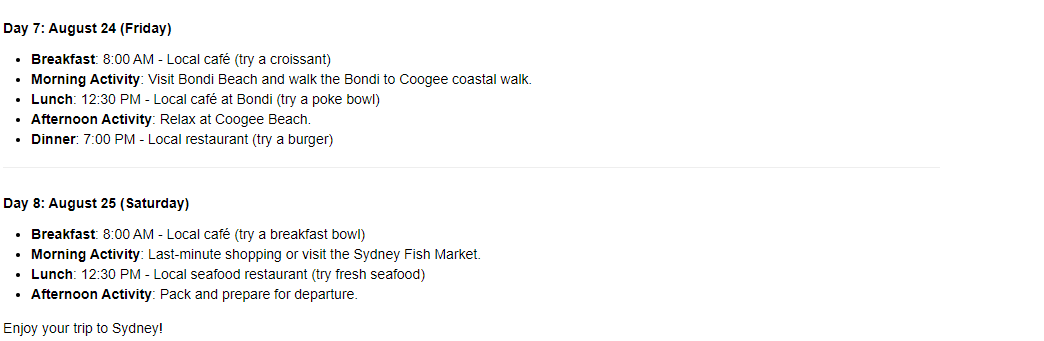

## Create detailed itineraries for all the cities in your trip

You'll use a 'for' loop to iterate over all the cities in the ```itinerary``` list and create a detailed itinerary for each location:

In [12]:
# Create an empty dictionary to store the itinerary for each destination
detailed_itinerary = {}

 # Use the 'for' loop over the 'itinerary' list   
for trip_stop in itinerary:
    city = trip_stop["City"]
    country = trip_stop["Country"]
    arrival = trip_stop["Arrival"]
    departure = trip_stop["Departure"]
    # Load a file CSV from a file city dot csv. 
    # If city is sidney, this f-string would turn this file name into sydney.csv
    rest_dict = read_csv(f"{city}.csv")
    
    print(f"Creating detailed itinerary for {city}, {country}.")
    
    prompt = f"""I will visit {city}, {country} from {arrival} to {departure}. 
    Create a daily itinerary with detailed activities. 
    Designate times for breakfast, lunch, and dinner. 

    I want to visit the restaurants listed in the restaurant dictionary without repeating any place.
    Make sure to mention the specialty that I should try at each of them.

    Restaurant dictionary:
    {rest_dict}

    """
    # Store the detailed itinerary for the city to the dictionary
    detailed_itinerary[city] = get_llm_response(prompt)

Creating detailed itinerary for New York, USA.
Creating detailed itinerary for Rio de Janeiro, Brazil.
Creating detailed itinerary for Cape Town, South Africa.
Creating detailed itinerary for Istanbul, Turkey.
Creating detailed itinerary for Paris, France.
Creating detailed itinerary for Tokyo, Japan.
Creating detailed itinerary for Sydney, Australia.


You can now access the detailed itinerary for any city by passing in the city name as the key to the `detailed_itinerary` dictionary:

In [13]:
# Print in Markdown format
display(Markdown(detailed_itinerary["Tokyo"]))

### Tokyo Itinerary: August 10 - August 17

#### Day 1: August 10 (Saturday)
- **Breakfast**: 8:00 AM - Local café (try a Japanese breakfast set)
- **Morning Activity**: Explore Asakusa and visit Senso-ji Temple
- **Lunch**: 12:00 PM - **Tsukiji Outer Market**  
  *Specialty*: Fresh sashimi and street food
- **Afternoon Activity**: Stroll through Ueno Park and visit the Tokyo National Museum
- **Dinner**: 7:00 PM - **Sukiyabashi Jiro**  
  *Specialty*: Omakase sushi

---

#### Day 2: August 11 (Sunday)
- **Breakfast**: 8:00 AM - Hotel breakfast
- **Morning Activity**: Visit the Meiji Shrine and Harajuku
- **Lunch**: 12:30 PM - **Afuri**  
  *Specialty*: Yuzu shio ramen
- **Afternoon Activity**: Explore Shibuya and see the famous Shibuya Crossing
- **Dinner**: 6:30 PM - **Den**  
  *Specialty*: Creative Japanese cuisine

---

#### Day 3: August 12 (Monday)
- **Breakfast**: 8:00 AM - Local bakery (try melon bread)
- **Morning Activity**: Visit the Tokyo Tower
- **Lunch**: 12:00 PM - **Ichiran Ramen**  
  *Specialty*: Tonkotsu ramen
- **Afternoon Activity**: Explore Roppongi Hills and the Mori Art Museum
- **Dinner**: 7:00 PM - **Ginza Kojyu**  
  *Specialty*: Kaiseki (traditional multi-course meal)

---

#### Day 4: August 13 (Tuesday)
- **Breakfast**: 8:00 AM - Traditional Japanese breakfast at a ryokan
- **Morning Activity**: Day trip to Nikko (Toshogu Shrine)
- **Lunch**: 12:00 PM - Local eatery in Nikko (try yuba)
- **Dinner**: 7:00 PM - **Tempura Kondo**  
  *Specialty*: Seasonal vegetable and seafood tempura

---

#### Day 5: August 14 (Wednesday)
- **Breakfast**: 8:00 AM - Hotel breakfast
- **Morning Activity**: Visit Akihabara for electronics and anime culture
- **Lunch**: 12:30 PM - **Kyubey**  
  *Specialty*: Sushi
- **Afternoon Activity**: Explore the Imperial Palace and East Gardens
- **Dinner**: 6:30 PM - **Akasaka Kikunoi**  
  *Specialty*: Kaiseki

---

#### Day 6: August 15 (Thursday)
- **Breakfast**: 8:00 AM - Local café (try Japanese pancakes)
- **Morning Activity**: Visit Odaiba and teamLab Borderless
- **Lunch**: 12:00 PM - Local food court (try various street foods)
- **Afternoon Activity**: Relax at Odaiba Seaside Park
- **Dinner**: 7:00 PM - **Narisawa**  
  *Specialty*: Innovative tasting menu

---

#### Day 7: August 16 (Friday)
- **Breakfast**: 8:00 AM - Hotel breakfast
- **Morning Activity**: Explore the trendy neighborhood of Shimokitazawa
- **Lunch**: 12:00 PM - Local café (try a Japanese curry)
- **Afternoon Activity**: Visit the National Art Center, Tokyo
- **Dinner**: 6:30 PM - **Den** (if you want to revisit) or explore a local izakaya for a casual dinner

---

#### Day 8: August 17 (Saturday)
- **Breakfast**: 8:00 AM - Local café (try matcha latte and pastries)
- **Morning Activity**: Last-minute shopping in Ginza
- **Lunch**: 12:00 PM - Local sushi spot (try a sushi platter)
- **Afternoon Activity**: Relax at a local onsen or spa
- **Departure**: Head to the airport

Enjoy your trip to Tokyo!

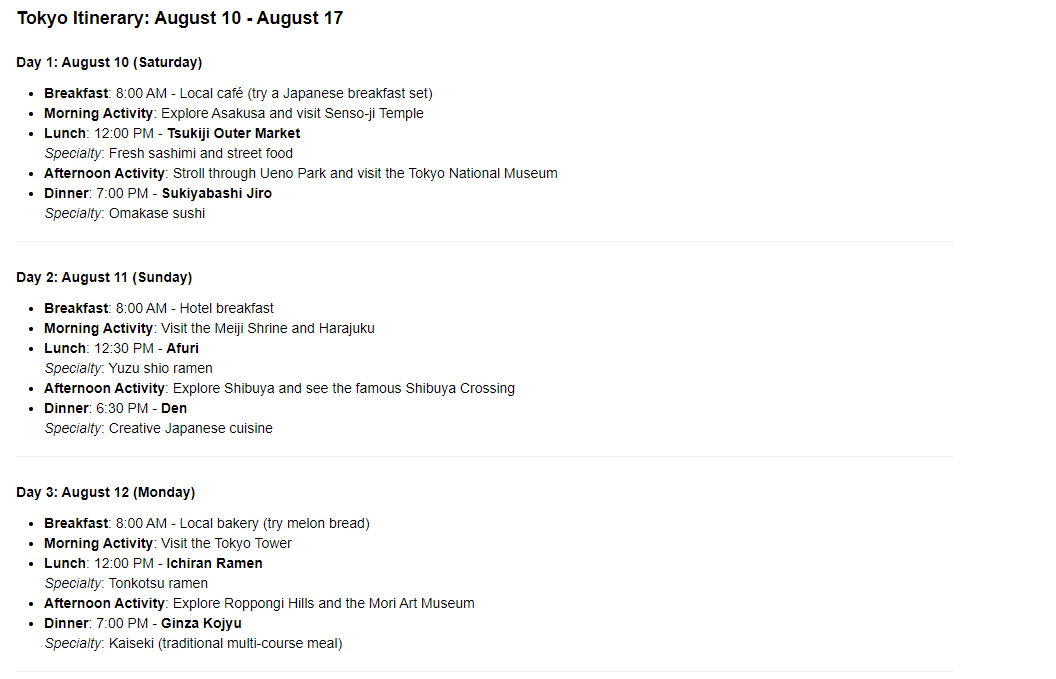

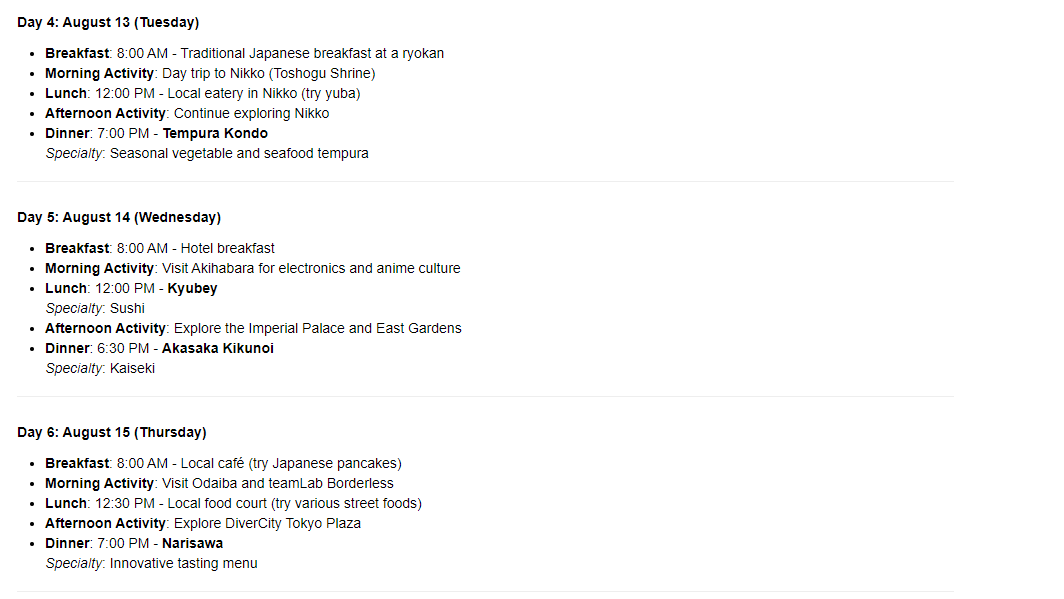

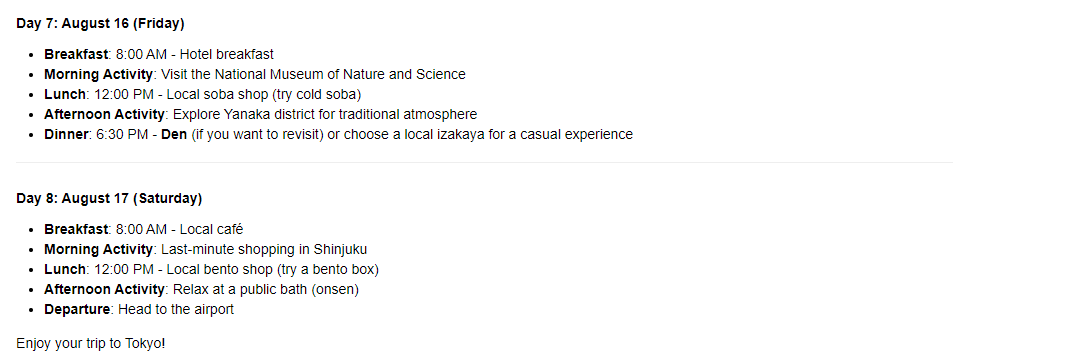

## Try it yourself! 

Update the code below to check out the itinerary for another city. 

**Options:**
- Cape Town
- Istanbul
- New York
- Paris
- Rio de Janeiro
- Sydney
- Tokyo

In [14]:
# Update the next line of code to view a different city
display(Markdown(detailed_itinerary["New York"]))

### New York Itinerary: July 1 - July 8

#### Day 1: July 1 (Saturday)
- **Breakfast**: 8:00 AM - **Katz's Delicatessen**  
  *Try the Pastrami on rye.*
- **Morning Activity**: 9:30 AM - Explore the Lower East Side and visit the Tenement Museum.
- **Lunch**: 12:30 PM - **Chelsea Market (Lobster Place)**  
  *Try the Lobster rolls.*
- **Afternoon Activity**: 2:00 PM - Walk the High Line and enjoy the views.
- **Dinner**: 6:00 PM - **Gramercy Tavern**  
  *Try the Roasted chicken with seasonal vegetables.*
- **Evening Activity**: 8:00 PM - Stroll through Madison Square Park.

---

#### Day 2: July 2 (Sunday)
- **Breakfast**: 8:00 AM - Local café (try a bagel with cream cheese).
- **Morning Activity**: 9:30 AM - Visit the Statue of Liberty and Ellis Island.
- **Lunch**: 1:00 PM - **Eleven Madison Park**  
  *Try the Sunflower seed risotto.*
- **Afternoon Activity**: 3:00 PM - Explore the Museum of Modern Art (MoMA).
- **Dinner**: 7:00 PM - Local pizzeria (try a classic New York slice).
- **Evening Activity**: 9:00 PM - Times Square for the lights and atmosphere.

---

#### Day 3: July 3 (Monday)
- **Breakfast**: 8:00 AM - Local diner (try pancakes).
- **Morning Activity**: 9:30 AM - Visit Central Park (walk or rent a bike).
- **Lunch**: 12:30 PM - **Peter Luger Steak House**  
  *Try the Porterhouse steak.*
- **Afternoon Activity**: 2:30 PM - Visit the American Museum of Natural History.
- **Dinner**: 6:00 PM - Local Asian restaurant (try dumplings).
- **Evening Activity**: 8:00 PM - Broadway show (book tickets in advance).

---

#### Day 4: July 4 (Tuesday)
- **Breakfast**: 8:00 AM - Local café (try a breakfast sandwich).
- **Morning Activity**: 9:30 AM - Visit the 9/11 Memorial & Museum.
- **Lunch**: 1:00 PM - Local food truck (try a falafel wrap).
- **Afternoon Activity**: 3:00 PM - Walk around Wall Street and Battery Park.
- **Dinner**: 6:00 PM - Rooftop restaurant (try a seasonal salad).
- **Evening Activity**: 9:00 PM - Watch the July 4th fireworks (check location).

---

#### Day 5: July 5 (Wednesday)
- **Breakfast**: 8:00 AM - Local bakery (try a croissant).
- **Morning Activity**: 9:30 AM - Visit the Metropolitan Museum of Art.
- **Lunch**: 1:00 PM - Local café (try a quinoa bowl).
- **Afternoon Activity**: 3:00 PM - Explore the Upper East Side.
- **Dinner**: 6:00 PM - Local steakhouse (try a filet mignon).
- **Evening Activity**: 8:00 PM - Walk along the East River.

---

#### Day 6: July 6 (Thursday)
- **Breakfast**: 8:00 AM - Local café (try a smoothie bowl).
- **Morning Activity**: 9:30 AM - Visit the Brooklyn Bridge and walk to Brooklyn.
- **Lunch**: 12:30 PM - Local pizzeria in Brooklyn (try a Sicilian slice).
- **Afternoon Activity**: 2:00 PM - Explore DUMBO and Brooklyn Bridge Park.
- **Dinner**: 6:00 PM - Local seafood restaurant (try grilled fish).
- **Evening Activity**: 8:00 PM - Return to Manhattan and enjoy a night view of the skyline.

---

#### Day 7: July 7 (Friday)
- **Breakfast**: 8:00 AM - Local café (try avocado toast).
- **Morning Activity**: 9:30 AM - Visit the Guggenheim Museum.
- **Lunch**: 1:00 PM - Local deli (try a Reuben sandwich).
- **Afternoon Activity**: 3:00 PM - Explore the West Village and Washington Square Park.
- **Dinner**: 6:00 PM - Local Italian restaurant (try spaghetti carbonara).
- **Evening Activity**: 8:00 PM - Jazz club in Greenwich Village.

---

#### Day 8: July 8 (Saturday)
- **Breakfast**: 8:00 AM - Local café (try a breakfast burrito).
- **Morning Activity**: 9:30 AM - Last-minute shopping in SoHo.
- **Lunch**: 12:00 PM - Local café (try a salad).
- **Afternoon Activity**: 2:00 PM - Visit the New York Public Library.
- **Departure**: 4:00 PM - Head to the airport.

Enjoy your trip to New York!

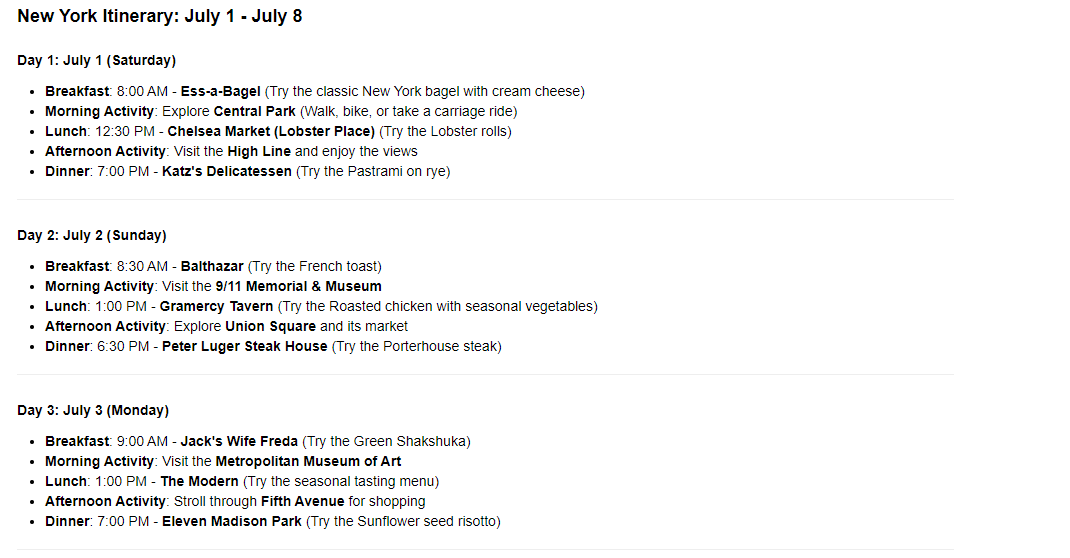

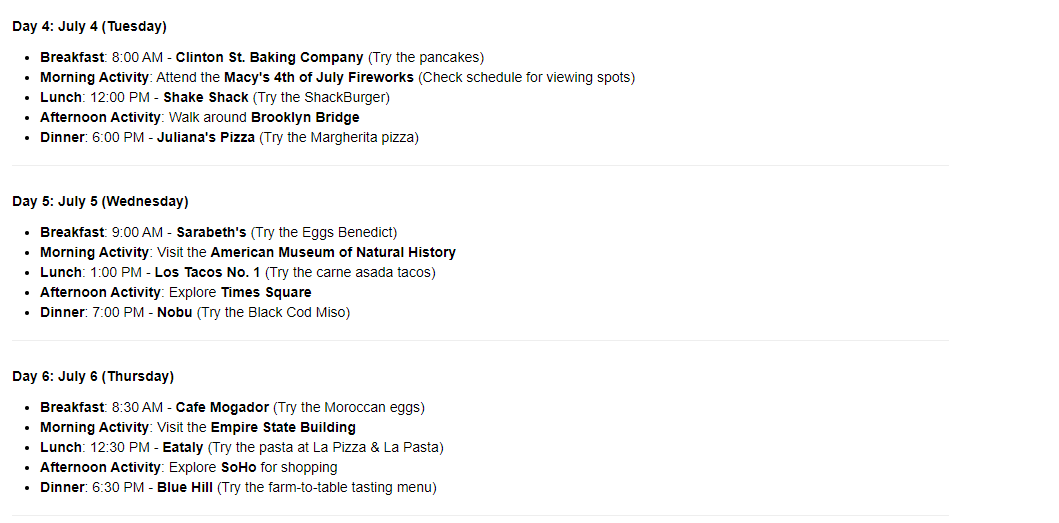

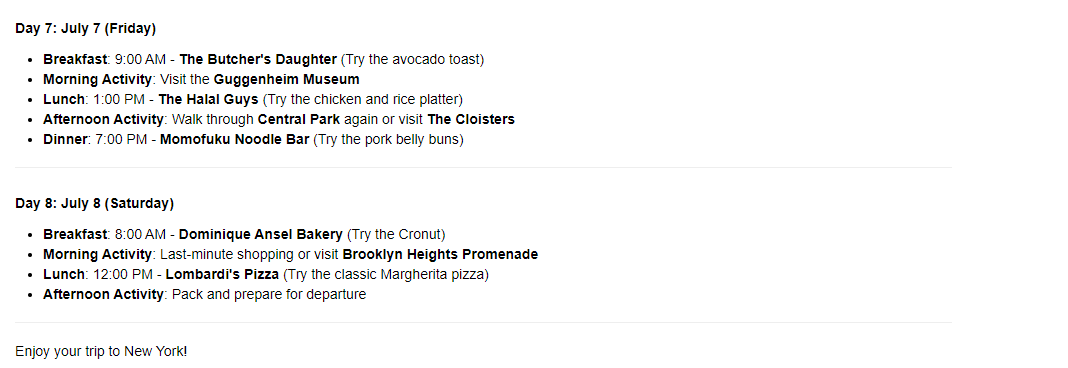

## Congratulations on completing this course! 🎉🎉🎉

Please go onto the fourth and final course of this sequence where you'll learn how to extend the capabilities of Python using code written by other programmers!